# Mohammad Faseeh Ahmed
# Prediction using Unsupervised ML
## Workshop - 1: K- Means Clustering
#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
#### Dataset : https://docs.google.com/spreadsheets/d/1EZ9JeMUowBEny3P-CseASLa5F5CB8xvnfGi8ekF483Q/edit#gid=421541506

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Importing the Iris dataset

In [2]:
from sklearn import datasets
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
# Printing  the first five elements of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##  Finding the optimum number of clusters for k-means classification

In [4]:
from sklearn.cluster import KMeans
x=df.iloc[:,0:3].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## Plotting the elbow function

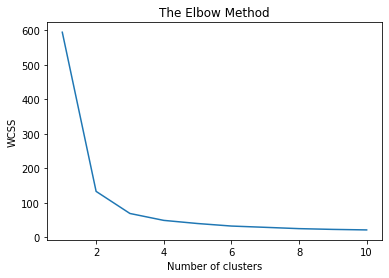

In [5]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#####  As we can see the elbow function doesn't  gradually decrease from 3

## Applying KMeans to the dataset and  Creating the KMeans classifier

In [6]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=kmeans.fit_predict(x)


## Visualising the clusters

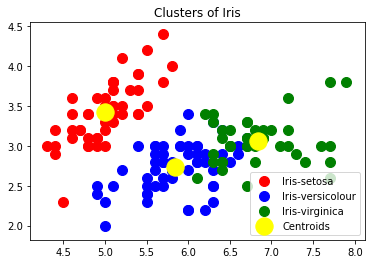

In [8]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of Iris')
plt.legend()
plt.show()